# Source Light Plot

In [1]:
import pickle
import numpy as np

names = ['J0407-5006', 'J0602-4335', 'J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']

# LaTeX header
print("\\begin{table}[htb]")
print("\\centering")
print("\\caption{F160W best-fit source light model parameters}")
print("\\label{tab:source_light_params_f814w}")
print("\\begin{tabular}lcccc}")
print("\\hline")
print("Lens System & $R_{\\text{S\\'ersic}}$ [arcsec] & $n_{\\text{S\\'ersic}}$ & $q$ \\\\")
print("\\hline")

for i, name in enumerate(names):
    filename = f"../cutout_data/{name}/F160W/{name}_F160W.pkl"
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    chain_list = loaded_data.get('chain_list')
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list[1]

    param_names = ['R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0']
    indices = [param_mcmc.index(p) for p in param_names]

    r_chain = samples_mcmc[:, indices[0]]
    n_chain = samples_mcmc[:, indices[1]]
    e1_chain = samples_mcmc[:, indices[2]]
    e2_chain = samples_mcmc[:, indices[3]]

    e_chain = np.sqrt(e1_chain**2 + e2_chain**2)
    q_chain = (1 - e_chain) / (1 + e_chain)

    def get_median_and_uncertainties(samples):
        median = np.percentile(samples, 50)
        lower = median - np.percentile(samples, 16)
        upper = np.percentile(samples, 84) - median
        return median, lower, upper

    r_median, r_lower, r_upper = get_median_and_uncertainties(r_chain)
    n_median, n_lower, n_upper = get_median_and_uncertainties(n_chain)
    q_median, q_lower, q_upper = get_median_and_uncertainties(q_chain)

    # Print table row
    print(f"{name} & "
          f"${r_median:.3f}^{{+{r_upper:.3f}}}_{{-{r_lower:.3f}}}$ & "
          f"${n_median:.2f}^{{+{n_upper:.2f}}}_{{-{n_lower:.2f}}}$ & "
          f"${q_median:.2f}^{{+{q_upper:.2f}}}_{{-{q_lower:.2f}}}$ & \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{table}")


\begin{table}[htb]
\centering
\caption{F160W best-fit source light model parameters}
\label{tab:source_light_params_f814w}
\begin{tabular}lcccc}
\hline
Lens System & $R_{\text{S\'ersic}}$ [arcsec] & $n_{\text{S\'ersic}}$ & $q$ \\
\hline
J0407-5006 & $0.265^{+0.008}_{-0.009}$ & $1.96^{+0.03}_{-0.05}$ & $0.55^{+0.02}_{-0.02}$ & \\
J0602-4335 & $0.124^{+0.004}_{-0.003}$ & $0.51^{+0.01}_{-0.01}$ & $0.58^{+0.01}_{-0.02}$ & \\
J0806+2006 & $0.366^{+0.043}_{-0.035}$ & $1.58^{+0.29}_{-0.36}$ & $0.64^{+0.06}_{-0.05}$ & \\
J1442+4055 & $0.495^{+0.004}_{-0.007}$ & $1.36^{+0.12}_{-0.11}$ & $0.56^{+0.02}_{-0.02}$ & \\
J1515+1511 & $0.498^{+0.002}_{-0.003}$ & $1.98^{+0.01}_{-0.03}$ & $0.84^{+0.03}_{-0.03}$ & \\
J1620+1203 & $0.316^{+0.014}_{-0.013}$ & $1.58^{+0.17}_{-0.15}$ & $0.89^{+0.04}_{-0.05}$ & \\
J2325-5229 & $0.498^{+0.001}_{-0.003}$ & $1.85^{+0.09}_{-0.10}$ & $0.81^{+0.02}_{-0.02}$ & \\
\hline
\end{tabular}
\end{table}


-19.765382015833694 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  19.76538201583369
-3.3606313429886003 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  3.3606313429886003
-8.730030198632656 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  8.730030198632658
-16.615349492699963 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  16.61534949269996
-2.437292598810847 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  2.4372925988108465
-0.8185785107311209 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8185785107311206
-1.877767610928843 reduced X^2 of all evaluated ima

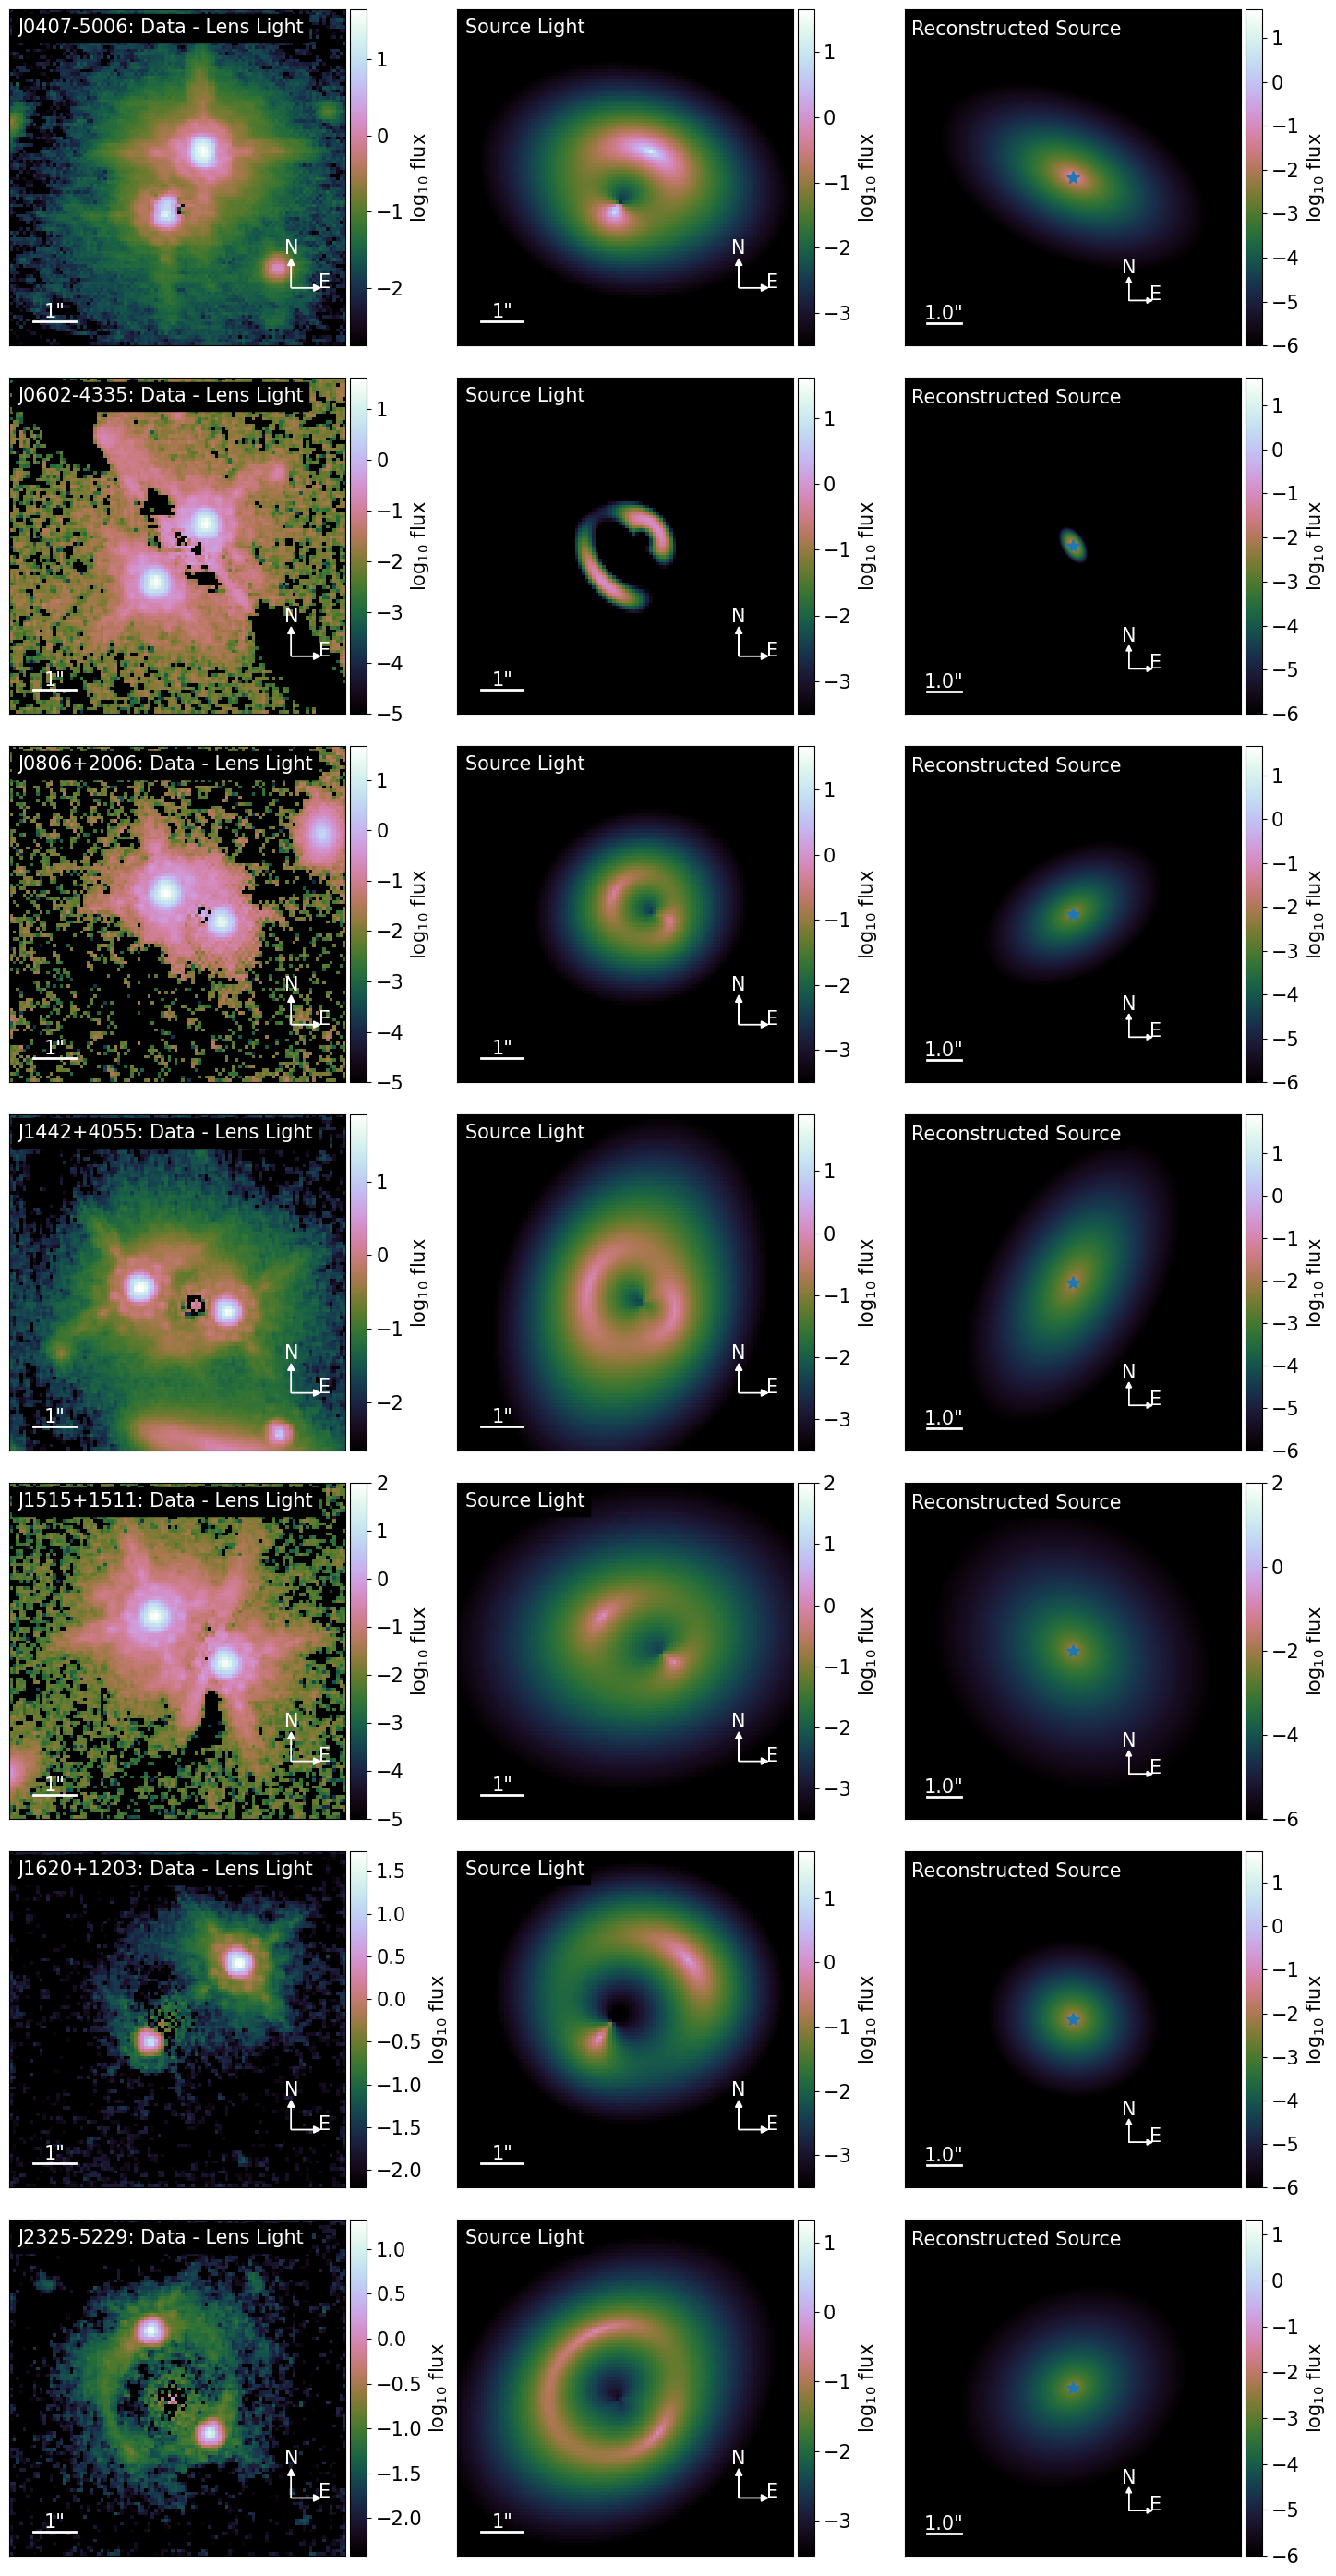

In [7]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
names = ['J0407-5006', 'J0602-4335', 'J0806+2006', 'J1442+4055', 'J1515+1511', 'J1620+1203', 'J2325-5229']
filter = 'F160W'
fontsize = 14

nrows = len(names)
fig, axes = plt.subplots(nrows, 3, figsize=(15, 28))

for i, name in enumerate(names):
    filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # generate separate component plots
    modelPlot.decomposition_plot(
            ax=axes[i, 1], text="Source Light", source_add=True, unconvolved=True, v_min = -3.5
        )    
    modelPlot.source_plot(
            ax=axes[i, 2], text="Reconstructed Source", deltaPix_source=0.01, numPix=1000, v_min = -6., scale_size = 1
        )    
    modelPlot.subtract_from_data_plot(
            ax=axes[i, 0], text=f"{name}: Data - Lens Light", lens_light_add=True
        )
    
plt.tight_layout()
#plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()


-1.877767610928843 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.8777676109288448


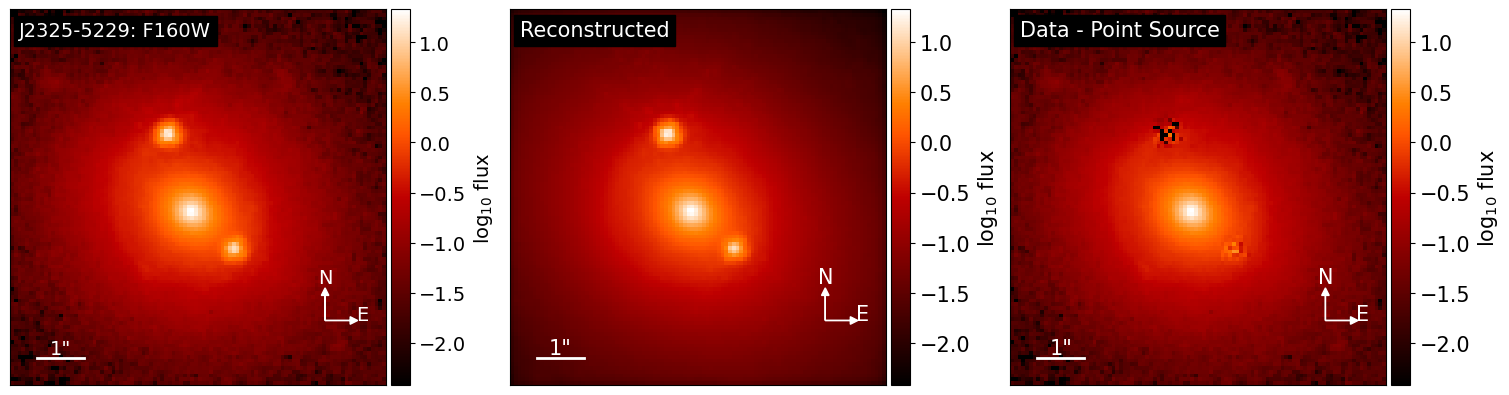

In [ ]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
name = 'J2325-5229'
filter = 'F160W'
fontsize = 14

fig, axes = plt.subplots(1, 3, figsize=(15, 15))


filename = f"../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

    # generate separate component plots
modelPlot.data_plot(
            ax=axes[0], text=f"{name}: {filter}", font_size = fontsize
        )    
modelPlot.model_plot(
            ax=axes[1], text="Reconstructed"
        )    

modelPlot.subtract_from_data_plot(ax=axes[2], point_source_add = True, text='Data - Point Source')

plt.tight_layout()
#plt.subplots_adjust(wspace=0.28, hspace=0.05)

plt.show()
